# Hypothesis testing

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
% matplotlib inline

In [14]:
# import microsoft.csv, and add a new feature - logreturn
ms = pd.DataFrame.from_csv('../data/microsoft.csv')
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])
ms.head()

,Open,High,Low,Close,Adj Close,Volume,logReturn
Date,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.006652
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.009238
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.014786
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.012625
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,0.028994


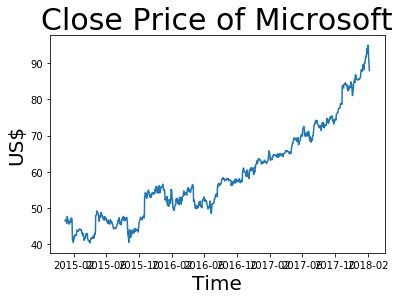

In [16]:
plt.title("Close Price of Microsoft",size=30)
plt.xlabel("Time",size=20)
plt.ylabel("US$",size=20)
plt.plot(ms.loc[:,'Close'])

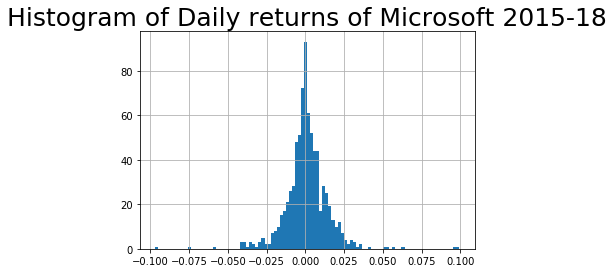

In [17]:
plt.title("Histogram of Daily returns of Microsoft 2015-18",size=25)
ms.loc[:,'logReturn'].dropna().hist(bins=100)

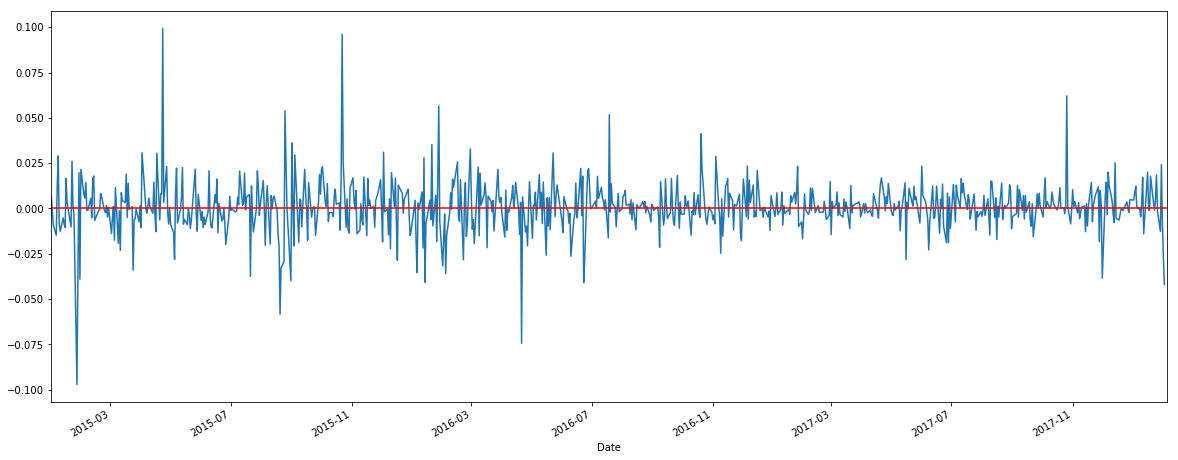

In [7]:
# Log return goes up and down during the period
ms['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

## Steps involved in testing a claim by hypothesis testing

### Step 1: Set hypothesis

$H_0 : \mu = 0$ 
$H_a : \mu \neq 0$

H0 means the average stock return is 0
H1 means the average stock return is not equal to 0

### Step 2: Calculate test statistic

In [6]:
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.614147714


### Step 3: Set desicion criteria

In [7]:
# confidence level-two tail test
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.95996398454 1.95996398454


### Step 4:  Make decision - shall we reject H0?

In [8]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: False


## Try one tail test by yourself ! 

$H_0 : \mu \leq 0$ 
$H_a : \mu > 0$

In [9]:
# step 2
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.614147714


** Expected output: ** 1.6141477140003675

In [12]:
# step 3 For one-tail test critical values
alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.64485362695


** Expected output: ** 1.64485362695

In [10]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject: False


** Expected output: ** At significant level of 0.05, shall we reject: False

# An alternative method: p-value

In [11]:
# step 3 (p-value)
p = 1 - norm.cdf(zhat, 0, 1)
print(p)

0.053247694997


In [12]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

At significant level of 0.05, shall we reject: False


### If Ha: mu not equal 0, it is two tail test and p-value=2(1-norm.cdf(np.abs(z), 0, 1))

### if Ha: mu>0, it is upper tail test and p-value=1-norm.cdf(z,0,1)

### if Ha:mu <0, it is lower tail test and p-value=norm.cdf(z,0,1)

In [26]:
# P-Value In 2-tail test , abs= absolute value, norm.cdf to calculate cumulative probability
alpha = 0.05
p= 2- 2*(norm.cdf(abs(zhat),0,1))
print(p)
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

0.106495389994
At significant level of 0.05, shall we reject: False


In [23]:
# P-value for Upper One-tailTest
p = 1 - norm.cdf(zhat, 0, 1)
print(p)
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

0.053247694997
At significant level of 0.05, shall we reject: False


In [24]:
#For Lower Tail t-tst
p = norm.cdf(zhat, 0, 1)
print(p)
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

0.946752305003
At significant level of 0.05, shall we reject: False
